## Introduction

In the fast-paced environment of a garment factory, optimizing worker productivity is crucial for meeting production targets and maintaining competitiveness. However, accurately predicting worker productivity poses a significant challenge, as it is influenced by a multitude of factors.

To address this challenge, our project focuses on developing a machine learning model to predict worker productivity in a garment factory. By leveraging historical data on worker performance, along with various contextual factors such as time of day, overtime, and incentives, our goal is to create a predictive model that can accurately forecast productivity levels for teams of workers.

Through the implementation of this predictive model, managers will gain valuable insights into factors that impact worker productivity and can proactively adjust staffing levels, schedules, and resource allocation to optimize efficiency and meet production goals.

The following is the dataset's official column information:

date - date in MM-DD-YYYY

quarter - a portion of the 4 quarters in a year which consist of 3 months each

department - associated department with the instance

day - day of the week

team - associated team number with instance

targeted_productivity - targeted productivity set by the authority for each team for each day

smv - standard minute value. The allocated time for a task

wip - work in progress. Includes the number of unfinished items for products

overtime - represents the number of overtime for each team in minutes

incentives - represents the amount of financial incentives (in BDT) that enables or motivates a course of action

idle_time - the duration of time when the production was interupted for several reasons

idle_men - the number of men who were idle due to interruption in production

no_of_style_change - number of changes in style of a particular product

no_of_workers - number of workers on each team

actual_productivity - the actual in productivity that was delivered by the workers

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

garment = pd.read_csv('garments_worker_productivity.csv')

## Inspecting the data
We will inspect the first and last 10 records of the data to have a sense of what each column contains 

In [2]:
pd.concat([garment.head(10), garment.tail(10)])

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


## Inspecting the characteristics of the data
We will check the columns data types to understand how to use them. Also, we will summarize the numeric columns to have a first look of the spread of data in each column and lastly check the total number of rows and columns that make up the data

In [3]:
print(garment.info())
print(garment.describe())
print(garment.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Rearranging the columns
The two productivity columns are far apart. We will bring them next to each other so that we can easily compare them. The columns are targeted_productivity and actual_productivity. We will then divide the actual productivity by the targeted productivity to view how well the targets are achieved in percentages

In [4]:
garment.columns

garment = garment[['date', 'quarter', 'department', 'day', 'team',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'targeted_productivity', 'actual_productivity']]

garment['productivity_difference'] = garment['actual_productivity'] / garment['targeted_productivity']
print(garment['productivity_difference'].describe())

count    1197.000000
mean        1.020433
std         0.316968
min         0.297552
25%         0.987259
50%         1.000713
75%         1.125162
max         7.469212
Name: productivity_difference, dtype: float64


We can see that a large majority of the targets were met. Around 75% of the tasks were completed.

## Visualizing the productivity difference column
In the previous cell we created a new column that explains the extent to which the targets are achieved. We will now visualizing it to aid our understanding of the column. The visualization will be done with boxplot, scatterplot and histogram

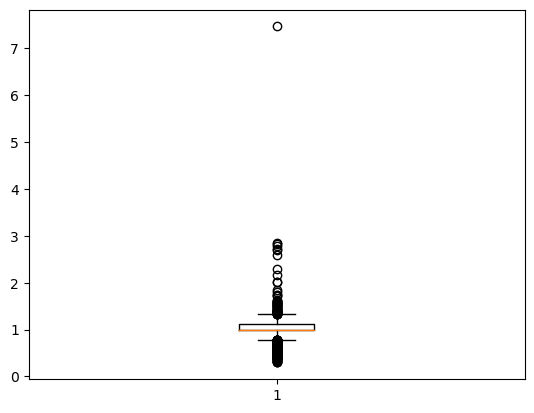

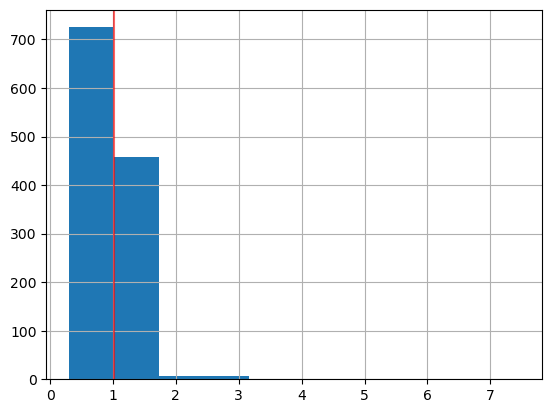

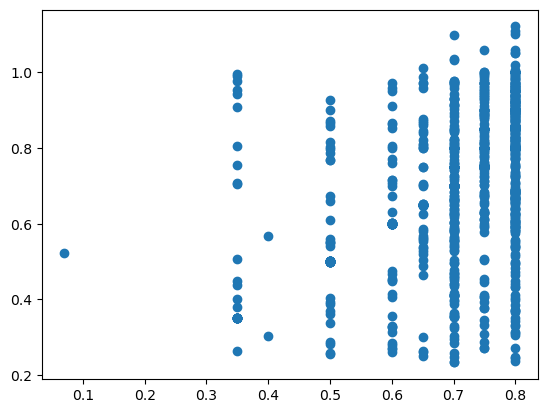

In [5]:
plt.boxplot(garment['productivity_difference'])
plt.show()
garment['productivity_difference'].hist()
plt.axvline(garment['productivity_difference'].mean(), color='red', alpha=.6)
plt.show()
plt.scatter(garment['targeted_productivity'], garment['actual_productivity'])
plt.show()

From the visualizations we can come to the conclusion that most of the data points are around 0.4 and 2 with outliers stretching to around 7

## Inspecting the null column
There seem to be null entries in wip column when the department is finishing. Let's run a code to confirm that this is the case

In [6]:
print(garment.loc[garment['wip'].isnull()])

print(garment.loc[garment['wip'].isnull(), 'department'].value_counts())

           date   quarter  department        day  team   smv  wip  over_time  \
1      1/1/2015  Quarter1  finishing    Thursday     1  3.94  NaN        960   
6      1/1/2015  Quarter1  finishing    Thursday     2  3.94  NaN        960   
13     1/1/2015  Quarter1  finishing    Thursday    10  3.94  NaN        960   
14     1/1/2015  Quarter1  finishing    Thursday     8  2.90  NaN        960   
15     1/1/2015  Quarter1  finishing    Thursday     4  3.94  NaN       2160   
...         ...       ...         ...        ...   ...   ...  ...        ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10  2.90  NaN        960   
1193  3/11/2015  Quarter2   finishing  Wednesday     8  3.90  NaN        960   
1194  3/11/2015  Quarter2   finishing  Wednesday     7  3.90  NaN        960   
1195  3/11/2015  Quarter2   finishing  Wednesday     9  2.90  NaN       1800   
1196  3/11/2015  Quarter2   finishing  Wednesday     6  2.90  NaN        720   

      incentive  idle_time  idle_men  n

Indeed our suspition is true. This indicates that there is a connection between null entries in the wip column and the department finishing. When confirming the total number of null entries in the departments we discovered that the finishing entry in the column appears twice as unique inputs. We will look into this next

## Fixing the deparment column anomaly
The department column shows finishing two seperate times even though its is supposed to appear as one. This is likely due to whitespaces in the entries of the values. We will investigate this and make the necessary adjustment

In [7]:
print(garment['department'].str.replace(' ', '').unique())

garment['department'].dtypes != 'object'

['sweing' 'finishing']


False

We ran a code that removes the whitespace in the department column. In other to deal with the same issue in other columns, we will create a function instead that will be applied to all of the object columns in the data.

## Normalizing all object columns
Just to be safe, we will apply the process used in the department column for all other columns. A function will be created to remove all whitespaces in the objects' columns

In [8]:
def strip_space(x):
        return x.str.replace(' ', '')
    
obj_col = garment.select_dtypes(exclude='number').columns
garment[obj_col] = garment[obj_col].apply(strip_space)

garment['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

We have successfully implemented the function on all of our object columns. Let's explore the dataset further

## Handling the missing column
The wip column appears to have a missing value when there are no work in progress, this does not looks deliberate, since all other values in the column are positive numbers. For this reason, we will treat the null values as zero, suggesting that the rows were left out because there was no number to add

In [9]:
garment['wip'].value_counts().sort_index(ascending=True)
garment['wip'].fillna(0, inplace=True)
garment

,date,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,targeted_productivity,actual_productivity,productivity_difference
0,1/1/2015,Quarter1,sweing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.80,0.940725,1.175907
1,1/1/2015,Quarter1,finishing,Thursday,1,3.94,0.0,960,0,0.0,0,0,8.0,0.75,0.886500,1.182000
2,1/1/2015,Quarter1,sweing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.80,0.800570,1.000713
3,1/1/2015,Quarter1,sweing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.80,0.800570,1.000713
4,1/1/2015,Quarter1,sweing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.80,0.800382,1.000477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,2.90,0.0,960,0,0.0,0,0,8.0,0.75,0.628333,0.837778
1193,3/11/2015,Quarter2,finishing,Wednesday,8,3.90,0.0,960,0,0.0,0,0,8.0,0.70,0.625625,0.893750
1194,3/11/2015,Quarter2,finishing,Wednesday,7,3.90,0.0,960,0,0.0,0,0,8.0,0.65,0.625625,0.962500
1195,3/11/2015,Quarter2,finishing,Wednesday,9,2.90,0.0,1800,0,0.0,0,0,15.0,0.75,0.505889,0.674519


## Inspecting columns lacking diversity
From the table, columns like idle_time, idle_men and no_of_style_change seem to be dominated by zeros. Let's compare the productivity of the zero columns and others to see if it makes any difference. If it does not make any significant difference, this means that the columns does not have any impact on our goal for this project. Therefore, they will be removed.

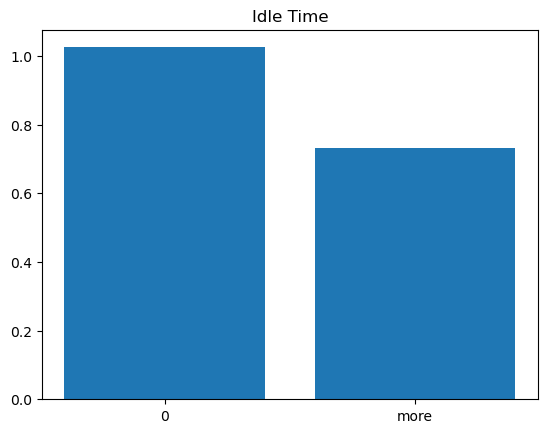

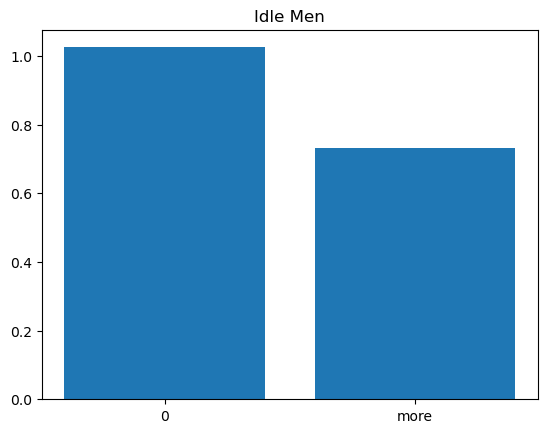

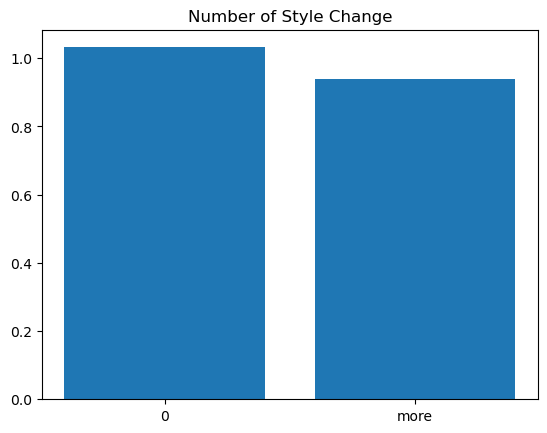

In [10]:
idle_time_0 = garment.loc[garment['idle_time'] == 0, 'productivity_difference']
idle_time_more = garment.loc[garment['idle_time'] != 0, 'productivity_difference']

idle_time_0_mean = idle_time_0.mean()
idle_time_more_mean = idle_time_more.mean()

idle_men_0 = garment.loc[garment['idle_men'] == 0, 'productivity_difference']
idle_men_more = garment.loc[garment['idle_men'] != 0, 'productivity_difference']

idle_men_0_mean = idle_men_0.mean()
idle_men_more_mean = idle_men_more.mean()

style_change_0 = garment.loc[garment['no_of_style_change'] == 0, 'productivity_difference']
style_change_more = garment.loc[garment['no_of_style_change'] != 0, 'productivity_difference']

style_change_0_mean = style_change_0.mean()
style_change_more_mean = style_change_more.mean()

plt.bar(['0', 'more'], [idle_time_0_mean, idle_time_more_mean])
plt.title('Idle Time')
plt.show()

plt.bar(['0', 'more'], [idle_men_0_mean, idle_men_more_mean])
plt.title('Idle Men')
plt.show()

plt.bar(['0', 'more'], [style_change_0_mean, style_change_more_mean])
plt.title('Number of Style Change')
plt.show()

In all of the columns the average productivity is greater when the values are zeros than they are greater than zeros. This suggests a difference in the results from the two categories. Let's investigate them more

## Testing for significant difference
We will utilize the ttest statistical technique to determine if the results from the rows with zeros is significantly different from the ones with values above zero. Our confidence interval will be 95%. This means that a pvalue below 5% will lead us to accept that there is a significant difference in the results from the two groups and reject it if otherwise. This will be done for the three columns we are evaluating: idle_time, idle_men and no_of_style_change

In [11]:
from scipy.stats import ttest_ind
tstats_1, p_value_1 = ttest_ind(idle_time_0, idle_time_more)
tstats_2, p_value_2 = ttest_ind(idle_men_0, idle_men_more)
tstats_3, p_value_3 = ttest_ind(style_change_0, style_change_more)

print('\033[1m' + 'Idle Time' + '\033[0m')
print(f'tstats: {tstats_1}, p_value{p_value_1}')

print('\n')

print('\033[1m' + 'Idle Men' + '\033[0m')
print(f'tstats: {tstats_2}, p_value{p_value_2}')

print('\n')

print('\033[1m' + 'Style Change' + '\033[0m')
print(f'tstats: {tstats_3}, p_value{p_value_3}')

Idle Time
tstats: 3.9228953711767844, p_value9.247360155994061e-05


Idle Men
tstats: 3.9228953711767844, p_value9.247360155994061e-05


Style Change
tstats: 3.3831852553148543, p_value0.0007397131708278762


The result shows an overwhelming support that there is a significant difference between the two groups. Since we have no good reason to remove the columns they will remain as part of our potential columns for feature selection.

## Finding correlations with target column

In [12]:
abs(garment.iloc[:,:-2].corrwith(garment['productivity_difference'])).sort_values(ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_15540\1102268925.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(garment.iloc[:,:-2].corrwith(garment['productivity_difference'])).sort_values(ascending=False)


targeted_productivity    0.304810
team                     0.127326
idle_men                 0.122472
no_of_style_change       0.085908
smv                      0.080869
idle_time                0.041068
incentive                0.034457
no_of_workers            0.024427
wip                      0.019341
over_time                0.015206
dtype: float64

Only the targeted_productivity column showed a strong correlation with the productivity_difference column

## Investigating unclear columns
It will be better having an understanding of the days when the workers work at the factory. Also, its unclear if the team column value indicate a tag given to each team or the quantity in each team. We will look into this and get clarity.

In [13]:
print(garment['day'].value_counts())
garment.team.unique()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64


array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4], dtype=int64)

The days shows that works are done everyday except on Friday. The team numbers is a tag given to each team. We know this because the number is consecutive and consistent from 1 to 12

## Understanding the non numeric column relationship with productivity score
We have conducted several EDA on the numeric columns, its time to do the same for the object columns to uncover relationships with the productivity column

Axes(0.125,0.11;0.775x0.77)


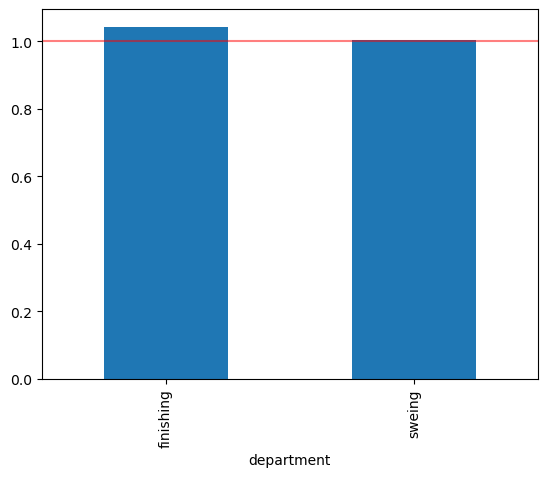

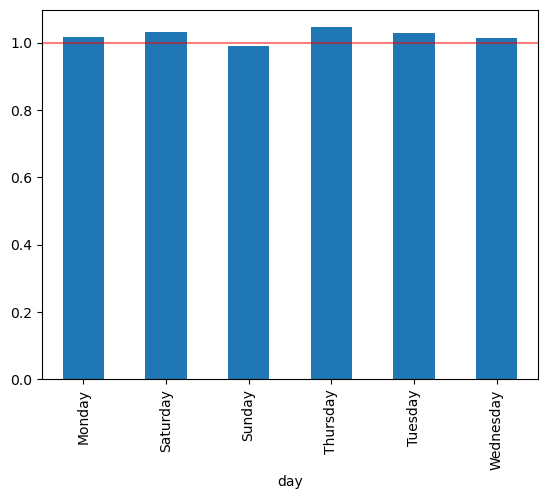

In [14]:
print(garment.groupby('department')['productivity_difference'].mean().plot.bar())
plt.axhline(y=1, color='red', alpha=.5)
plt.show()
garment.groupby('day')['productivity_difference'].mean().plot.bar()
plt.axhline(y=1, color='red', alpha=.5)
plt.show()

On average workers in the finishing department are more productive than those in the sewing department. We also see that workers are more productive on Thursdays, a day before their day off and Sunday being the least productive day

## Investigating the date column relationship with productivity score
Let's check to see if there are times in the date when productivity level is different than others. If the date does not show any real difference then it will be dropped as it indicates no importance to the productivity of the workers 

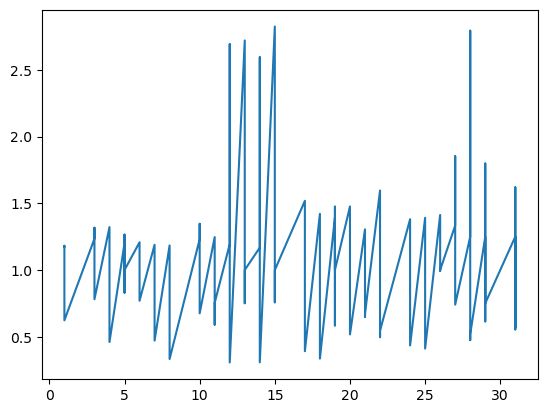

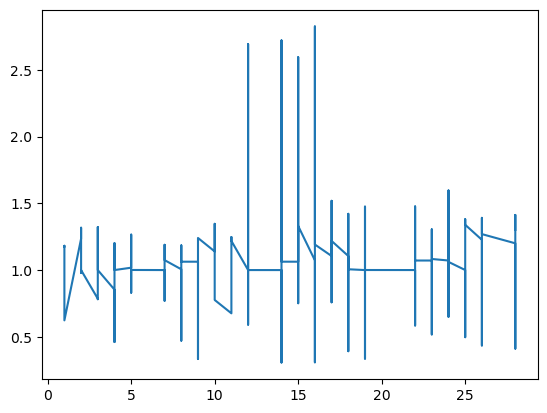

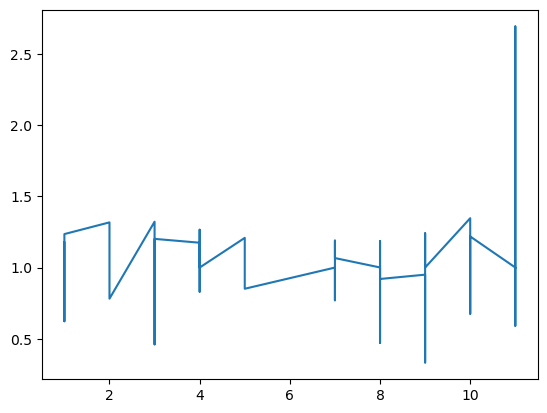

In [15]:
datetime = pd.to_datetime(garment['date'])
datetime_1 = datetime[datetime < '2-1-2015']
datetime_2 = datetime[(datetime >= '2-1-2015') & (datetime < '3-1-2015')]
datetime_3 = datetime[datetime >= '3-1-2015']

dates = [datetime_1, datetime_2, datetime_3]

for date in dates:
    plt.plot(date.dt.day, garment['productivity_difference'].iloc[:len(date)])
    plt.show()
#garment['productivity_difference'].iloc[:542]

We found a trend in times of the month. Productivity goes up around 11th to 15th of each month. This insight shows that the column may be useful in our model so we will keep it

## Choosing necessary features for the model
After conducting some exploratory analysis on our table, we will now eliminate unnecessary columns and restructure the remaining to prepare it for our model development. The following columns will be dropped: 1. date - because the dates only contain the first three months. Using it will not convey a result that can be applied on other months. However, a column for number of days in the month will be created because we found patterns between it and the productivity column 2. quarter - The same reason as the date column. 3. actual_productivity - to make it more interpretable we introduced productivity_difference column to account for the relationship between it and targeted_productivity. For this reason the column will not be useful in our model. 

In [16]:
garment['day_no'] = datetime.dt.day
garment = garment.drop(['date', 'quarter', 'actual_productivity'], axis=1)
garment.columns
garment = garment[['day_no', 'day', 'department', 'team', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'targeted_productivity', 'productivity_difference']]
garment['productivity_difference'] = round(garment['productivity_difference'], 2)

The columns have been dropped and the rest have been repositioned for easy comparison. The values in theproductivity_difference column have been updated to have two decima numbers to match the style in other columns

## Standardizing the columns
It's time to convert all our columns to numbers so that we can perform training and test on the data. We will also change the productivity_difference to productivity_score so that the term can capture the column better

In [17]:
garment.rename(columns={'productivity_difference': 'productivity_score'}, inplace=True)
day_replace = {'Saturday': '1', 'Sunday': '2', 'Monday': '3', 'Tuesday': '4', 'Wednesday': '5', 'Thursday': '6'}
garment['day'] = garment['day'].map(day_replace).astype(int)
garment = pd.get_dummies(garment)
#garment = garment[['day_no', 'day', 'team', 'department_finishing', 'department_sweing', 'smv', 'wip', 'over_time', 'incentive',
#       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
#       'targeted_productivity', 'productivity_score']]

The first day of the week is assigned to Saturday because workers have their day off on Fridays and begin the work week on Saturdays. The other columns were converted into dummy columns

## Importing our model libraries and splitting the dataset
For now, we will import the libraries that will be used for our model creation. The libraries will enable us to split our dataset to our desired sizes and perform evaluation on the model created

In [18]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix

x = garment.drop('productivity_score', axis=1)
y = garment['productivity_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=99)

Our dataset have now been splitted. The next step is to start building our model

## Building the model
We will start by building an unpruned decision tree and later refine the parameters to achieve a favourable outcome. Note that the tuning of the parameters will be done in this cell but only the final parameters that achieved the best result will be included in the model with no documentation of the steps taken to arrive at the final conclusion

In [19]:
d_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=7, random_state=75)
d_tree.fit(x_train, y_train)
score = d_tree.score(x_test, y_test)
print(d_tree.score(x_train, y_train))
score

0.7420009788478179


0.3707212781725955

While the result on the training data is impressive, the test result is far from it. The difference between the two is much and suggests overfitting of the training data. We will try other approaches to refine the model

## Examining the tree structure
After tuning the parameters we were unable to reach a satisfactory result for our model. It's time to inspect the tree to determine the potential cause of the low score generated from it.

In [20]:
print(export_text(d_tree, feature_names=list(x.columns)))

|--- targeted_productivity <= 0.21
|   |--- value: [7.47]
|--- targeted_productivity >  0.21
|   |--- targeted_productivity <= 0.38
|   |   |--- no_of_workers <= 26.00
|   |   |   |--- day_no <= 10.50
|   |   |   |   |--- day <= 2.00
|   |   |   |   |   |--- value: [2.30]
|   |   |   |   |--- day >  2.00
|   |   |   |   |   |--- over_time <= 1380.00
|   |   |   |   |   |   |--- value: [2.01]
|   |   |   |   |   |--- over_time >  1380.00
|   |   |   |   |   |   |--- value: [2.02]
|   |   |   |--- day_no >  10.50
|   |   |   |   |--- day <= 5.50
|   |   |   |   |   |--- team <= 5.00
|   |   |   |   |   |   |--- day_no <= 13.50
|   |   |   |   |   |   |   |--- value: [2.71]
|   |   |   |   |   |   |--- day_no >  13.50
|   |   |   |   |   |   |   |--- value: [2.59]
|   |   |   |   |   |--- team >  5.00
|   |   |   |   |   |   |--- team <= 7.00
|   |   |   |   |   |   |   |--- value: [2.79]
|   |   |   |   |   |   |--- team >  7.00
|   |   |   |   |   |   |   |--- value: [2.84]
|   |   |   

We can see that one of our leaves has only one observation. To verify if this contributed to the low score, we will prevent this from happening by tuning the parameter. Before we do that, let's look at how the features contributed to the result

## Visualizing feature importance
We will create a plot that shows each feature impact/importance in the model before we work on our parameters to try to optimize the result from our model

<BarContainer object of 14 artists>

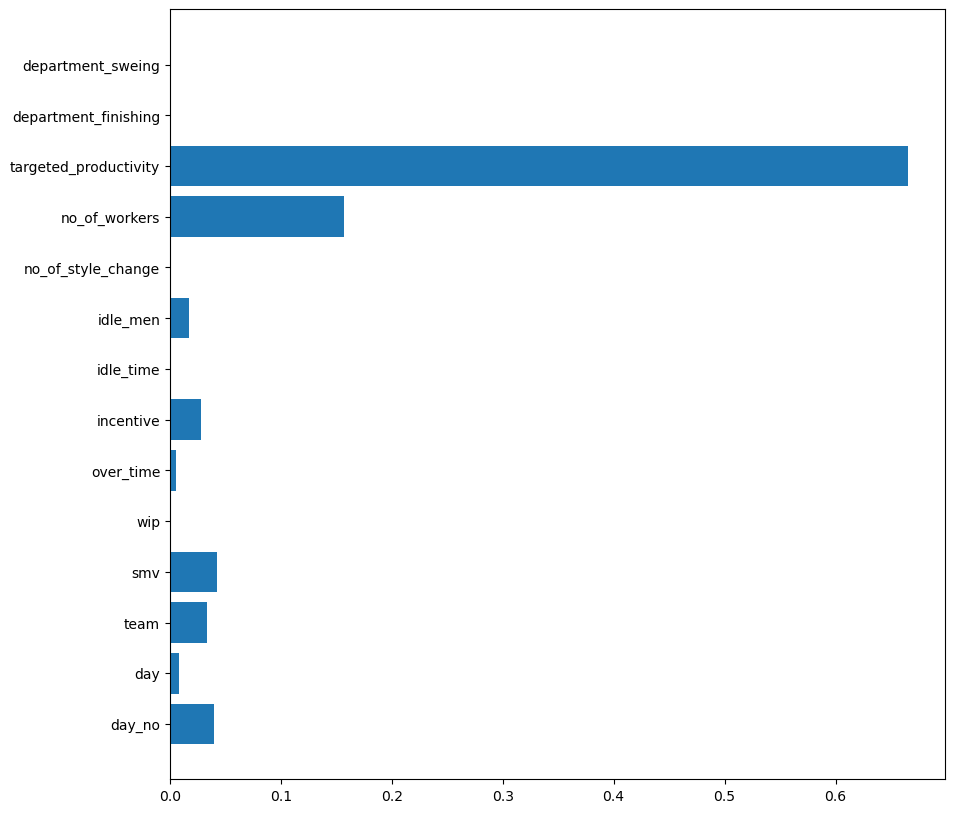

In [21]:
plt.figure(figsize=(10,10))
plt.barh(d_tree.feature_names_in_, d_tree.feature_importances_)

The result shows that the feature that has the most impact on the result is targeted_productivity followed by number of workers. A few more features had smaller impacts on the outcome while 4 others showed no impact. Since the inclusion of the other columns does not affect the computational time of running our model, we will not exclude them from the features. Also, other models will be created and applied to the data, it is possible that they will utilize the features to improve the results

## Adding more parameters
The tree structure showed a leaf with one sample and a high value. Let's control this output and see if it helps improve the score of our model

In [22]:
d_tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf= 2, min_samples_split= 4, max_depth=5, random_state=75)
d_tree.fit(x_train, y_train)
score = d_tree.score(x_test, y_test)
print(d_tree.score(x_train, y_train))
score

0.2916960748880211


0.2839015657874854

The parameter tuning stabilized the difference between the training and test result. However, it failed to add any significant improvement to the general results of the model

## Introducing random forest
Since the decision tree and optimizations made did not produce a satisfactory result, let's take advantage of majority votes from random forest subtrees to help improve the results of the model. We will experiment with different parameters and only include the one with the best result in the model below

In [23]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(criterion= 'squared_error', n_estimators=5, max_depth=7, random_state=75, n_jobs=-1)
random.fit(x_train, y_train)
te_pred = random.predict(x_test)
tr_score = random.score(x_train, y_train)
te_score = random.score(x_test, y_test)
print(tr_score)
te_score

0.6521406160142637


0.4631390915163852

The result of the random forest produced a significant improvement in the Rsquare. The difference between the test and training data is not huge, suggesting that our model can generalize well to unseen data at a close level. This is a big achievement from the score produced by previous models.

## Displaying the predictions
Let's put the predictions and actual results side by side for comparison. Seeing the two results give us a sense of the true capability of our model. We will return 20 random rows for comparison

In [24]:
print(mean_absolute_error(te_pred, y_test))
pd.DataFrame({'pred': te_pred, 'actual': y_test}).sample(20)


0.1130830473542133


,pred,actual
669,0.820637,0.81
131,1.095246,1.06
968,1.004313,1.00
958,0.950000,1.29
450,1.008218,1.00
689,0.960900,1.00
646,0.946513,0.96
864,1.114761,1.74
300,1.176572,1.29
16,0.871050,0.68


The result shows close predictions overall. However, some predictions deviate significantly from the actual charges. This tells us that despite the promising results displayed, our model can make predictions far from the actual case

## Testing results on unused data
Let's introduce the oob_score to test the result on data that were not used in the random forest training process. This will allow us use all the dataset as a potential candidate in the training process with the observations not featured in the training stage used as the test data

In [25]:
oob_random = RandomForestRegressor(n_estimators=50, max_depth=10, oob_score=True, random_state=24, n_jobs=-1)
oob_random.fit(x, y)
oob_pred = oob_random.oob_prediction_
oob_score = oob_random.oob_score_
print(oob_score)
pd.DataFrame({'pred': oob_pred, 'actual': y}).sample(20)
#print(mean_absolute_error(oob_pred, y))

0.33287486090560503


,pred,actual
389,1.002016,1.00
248,0.999730,1.00
1164,0.968937,1.06
1123,0.840596,1.00
247,1.051223,1.03
964,1.114501,1.15
759,0.796018,1.00
383,0.910054,0.93
683,0.994740,1.13
754,1.037104,1.00


Even though the table shows results that are close to the prediction capability of the previous model, the new model had a poorer metric result. Next, we will convert our outcome column to classes to apply classification models on it

## Masking the outcome column
After creating and optimizing a linear outcome of our data with decision tree methods we will now explore the classification aspect of the model. In other to create a decision tree that shows the classes by name on the leaves, we will create an outcome column with objects/strings as its properties as opposed to the regular numeric column accepted in sci-kit learn. The pandas mask function will help us bypass the challenge of not being able to use a string as an outcome column. The target achieved column which will be used as the outcome column will contain two classes, yes - meaning that the target was achieved and no - the target was not achieved

In [26]:
#garment.loc[garment['productivity_score'] >= 1, 'target_achieve'] = 1
#garment.loc[garment['productivity_score'] < 1, 'target_achieve'] = 0
garment['target_achieved'] = ''
garment['target_achieved'].mask(garment['productivity_score'] >= 1, 'yes', inplace=True)
garment['target_achieved'].mask(garment['productivity_score'] < 1, 'no', inplace=True)

## Creating training and test data
Now that the masked column has been created, its time to change the outcome to the new one created. The dataset will be splitted with a test data of 20% of the entire dataset

In [27]:
x = garment.drop(['productivity_score', 'target_achieved'], axis=1)
y = garment['target_achieved']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=99)

## Creating first decision tree classifier model
Just as we did for the regression version of the model, let's start by building a simple model with a controlled max depth. The max depth parameter will not go above 3. This will allow us have a first view of how a simple model will perform

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
c_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=72)
c_tree.fit(x_train, y_train)
ctr_score = c_tree.score(x_train, y_train)
cte_score = c_tree.score(x_test, y_test)
print(ctr_score)
cte_score

0.8401253918495298


0.7875

Our first model did not perform badly. We can now iterate on the results by building optimized versions to improve the result.

## Displaying classification result
Before we start building an optimized version, let's see how it performed against different metrics.

In [29]:
print(classification_report(c_tree.predict(x_test), y_test))

              precision    recall  f1-score   support

          no       0.42      0.57      0.48        42
         yes       0.90      0.83      0.87       198

    accuracy                           0.79       240
   macro avg       0.66      0.70      0.68       240
weighted avg       0.82      0.79      0.80       240



The result shows that the model is able to predict the positive class at a very high level of accuracy. However, the positive cases were poorly predicted

In [30]:
#print(export_text(c_tree, feature_names=list(x.columns)))

## Visualizing the decision tree structure
Luckily, our max depth is small enough to create visuals to view how the model arrives at its predicitions. Let's create a plot that shows this

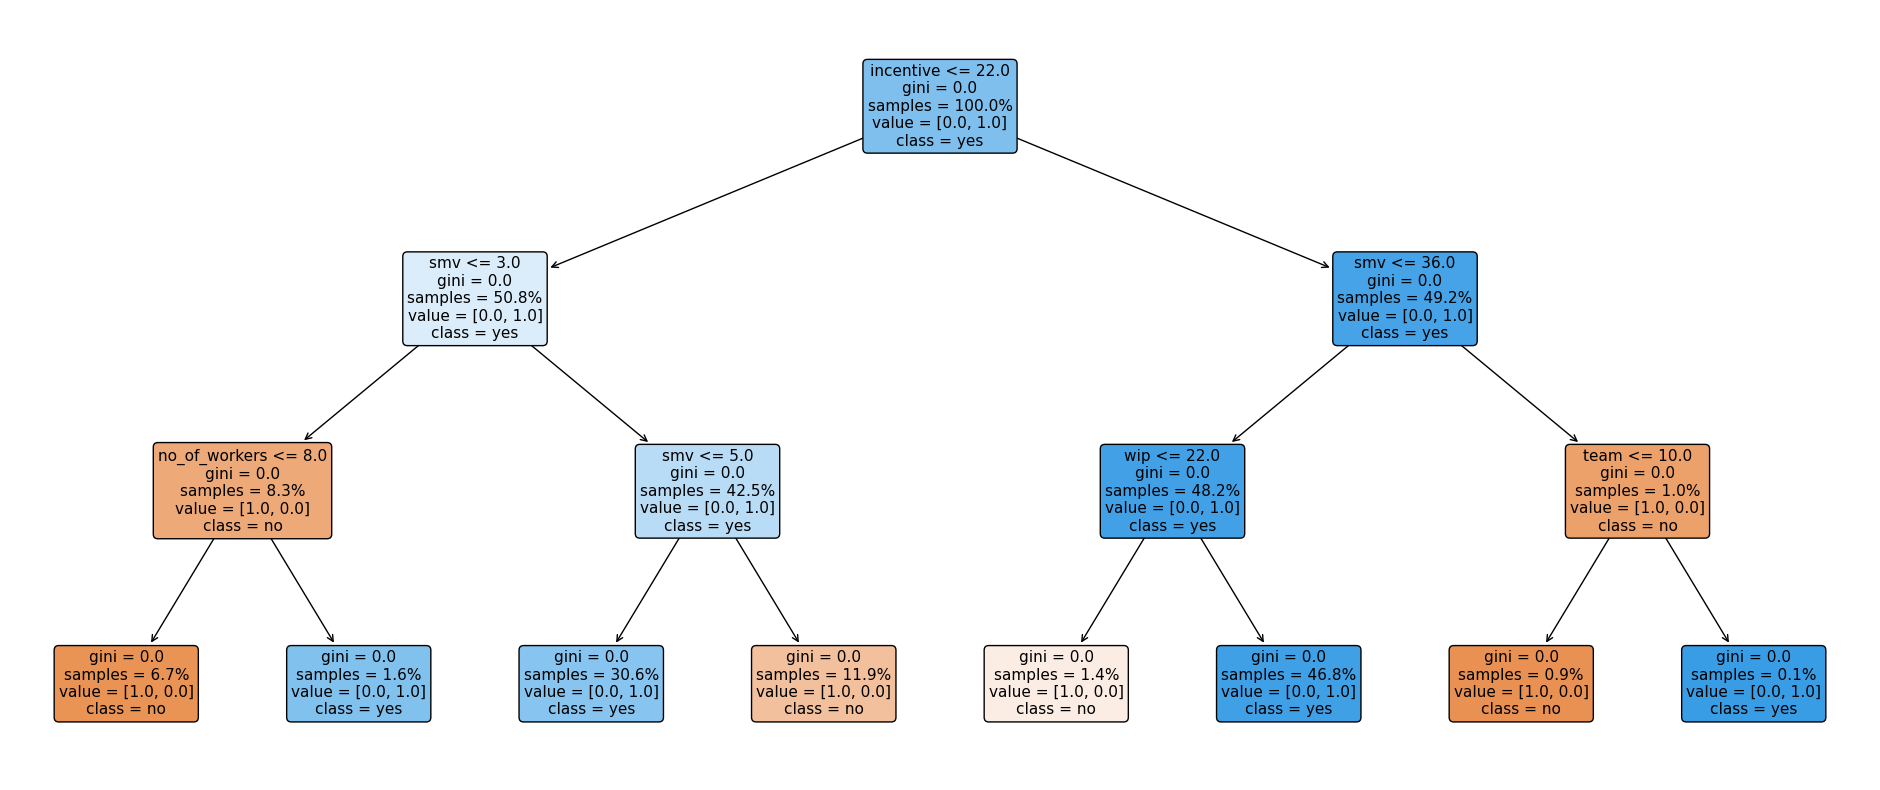

In [31]:
plt.figure(figsize=(24,10))
_ = plot_tree(c_tree, feature_names=x.columns, class_names= c_tree.classes_, filled=True, proportion=True, precision=0, rounded=True, fontsize=11)
plt.show()

## Fine tuning the model's parameters
The different parameters will be experimented with to arrive at an opotimal result. This parameters include random state, criterion, max depth etc.

In [32]:
c_tree = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=13)
c_tree.fit(x_train, y_train)
ctr_score = c_tree.score(x_train, y_train)
cte_score = c_tree.score(x_test, y_test)
print(ctr_score)
cte_score

0.9174503657262278


0.8208333333333333

We got a much improved result from the previous model by increasing the max depth and changing random state. While the increase max depth makes it diffult to interprete the results of the model, it makes up for it in increasing predictions accuracy.

## Displaying classification report
Let's examing the other metrics result on the classes

In [33]:
print(classification_report(c_tree.predict(x_test), y_test))
print(confusion_matrix(c_tree.predict(x_test), y_test))

              precision    recall  f1-score   support

          no       0.54      0.65      0.59        48
         yes       0.91      0.86      0.89       192

    accuracy                           0.82       240
   macro avg       0.73      0.76      0.74       240
weighted avg       0.83      0.82      0.83       240

[[ 31  17]
 [ 26 166]]


The performance on the other metrics increased, particularly on the negative class. The precision accuracy is now above 50 percent which marks a good improvement

## Probing the negative precision result
The negative precision result is significantly lower than the positive case which means that the model is poor at predicting negative cases. We will investigate if the cause of the wrongly predicted negative cases were because the values were barely positive.

In [34]:
a_train, a_test, b_train, b_test = train_test_split(garment['productivity_score'], garment['target_achieved'], test_size=.20, random_state=99)
data_test = pd.DataFrame({'score': a_test, 'y_test': y_test, 'pred': c_tree.predict(x_test)})
data_test[(data_test['pred'] == 'no') & (data_test['y_test'] == 'yes')]['score'].value_counts(bins=10)

(0.998, 1.061]    8
(1.122, 1.183]    3
(1.183, 1.244]    2
(1.244, 1.305]    1
(1.305, 1.366]    1
(1.488, 1.549]    1
(1.549, 1.61]     1
(1.061, 1.122]    0
(1.366, 1.427]    0
(1.427, 1.488]    0
Name: score, dtype: int64

The result shows that majority of the misclassification are on outcomes that barely achieved the targets. One reason for this is likely because there are a lot of outcomes that a very close to the positive cases. This may have caused features with similar records to be misclassified

## Applying random forest classifier
We will see if relying on the predictions of multiple subtrees can help correct the deficit in the negative classes predictions.

In [35]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
r_model = RandomForestClassifier(n_estimators= 30, max_depth=7, random_state=11)
r_model.fit(x_train, y_train)
r_model.score(x_test, y_test)

0.8375

The result is not looking promising as it produced a lower prediction score.

## Displaying classification report
Let's see how the performance compares to others

In [36]:
print(classification_report(r_model.predict(x_test), y_test))
print(confusion_matrix(r_model.predict(x_test), y_test))

              precision    recall  f1-score   support

          no       0.54      0.70      0.61        44
         yes       0.93      0.87      0.90       196

    accuracy                           0.84       240
   macro avg       0.74      0.79      0.76       240
weighted avg       0.86      0.84      0.85       240

[[ 31  13]
 [ 26 170]]


Despite the poorer accuracy of the model, there is a noticeable improvement in the prediction of the positive case but a decline in the accuracy of the negative case.

## Introducing oob_score
We will use the whole of the dataset in the generation of the random forest scores. This will be achieved by using observations not used in the training phase of the model to test the model score

In [37]:
oob_model = RandomForestClassifier(n_estimators= 30, oob_score=True, max_depth=5, random_state=11)
oob_model.fit(x, y)
print(oob_model.oob_score_)

oob_pred = pd.DataFrame(oob_model.oob_decision_function_)
oob_pred['pred'] = oob_pred.idxmax(axis=1)
oob_pred[oob_pred['pred'] == 1] = 'yes'
oob_pred[oob_pred['pred'] == 0] = 'no'

0.8279030910609858


Again a poorer result was gotten. The oob_score failed to improve our model

## Creating classification report

In [38]:
print(classification_report(oob_pred['pred'], y))

              precision    recall  f1-score   support

          no       0.45      0.78      0.57       178
         yes       0.96      0.84      0.89      1019

    accuracy                           0.83      1197
   macro avg       0.70      0.81      0.73      1197
weighted avg       0.88      0.83      0.84      1197



Again, there is an improvement in the prediction of the positive case but a decline in the negative case

## Checking representation of cases
In addition to the fact that the negative classes may have been misclassified because there are a lot of negative cases with values close to the value of the positive classes, another reason may be under representation of the negative class in the training and test data. Let's see the number of cases for each classes in our test and training data

In [39]:
print(y_train.value_counts())
y_test.value_counts()

yes    710
no     247
Name: target_achieved, dtype: int64


yes    183
no      57
Name: target_achieved, dtype: int64

We can confirm that there is an imbalance in the number of representation of each classes in the data

## Introducing extra random trees
Unlike the random forest where the default bootstrapping parameter is false preventing the model from using the entire observations to create the subtrees, the extra tree will use all of the observations in our data and select a threshold at random

In [40]:
ext_model = ExtraTreesClassifier(n_estimators=30, max_depth=5, random_state=11)
ext_model.fit(x_train, y_train)
ext_model.score(x_test, y_test)

0.8083333333333333

Yet, again we have gotten a poorer result but let's see what the classification report says

## Displaying classification report

In [41]:
print(classification_report(ext_model.predict(x_test), y_test))

              precision    recall  f1-score   support

          no       0.26      0.79      0.39        19
         yes       0.98      0.81      0.89       221

    accuracy                           0.81       240
   macro avg       0.62      0.80      0.64       240
weighted avg       0.92      0.81      0.85       240



At this point, there seem to be a clear pattern. Our optimization have produced results that improve the performance on the positive cases in each iteration while reducing that of the negative cases

## Applying minimal cost complexity pruning
This is a technique that uses optimal alphas to penalize an unpruned decision tree thereby reducing the leaves' impurity and error

In [42]:
unpruned = DecisionTreeClassifier(random_state=9)
cost_pruned = unpruned.cost_complexity_pruning_path(x_train, y_train)
cost_alpha = cost_pruned.ccp_alphas
len(cost_alpha)

alpha_results = []

for alpha in cost_alpha:
    subtree = DecisionTreeClassifier(random_state=9, ccp_alpha=alpha)
    subtree.fit(x_train, y_train)
    scores = subtree.score(x_test, y_test)
    alpha_results.append(scores)
    
alpha_scores = tuple(zip(cost_alpha, alpha_results))
max_alpha = max(alpha_scores, key=lambda x: x[1])[0]

cost_pruned = DecisionTreeClassifier(random_state=9, ccp_alpha=max_alpha)
cost_pruned.fit(x_train, y_train)
cost_pruned.score(x_test, y_test)

0.85

The pruned model produced an impressive result with an accuracy score better than previous models. Let's look at its classification report

## Displaying classification report

In [43]:
print(classification_report(cost_pruned.predict(x_test), y_test))

              precision    recall  f1-score   support

          no       0.63      0.71      0.67        51
         yes       0.92      0.89      0.90       189

    accuracy                           0.85       240
   macro avg       0.77      0.80      0.78       240
weighted avg       0.86      0.85      0.85       240



The model has produced the best performance in predicting negative cases so far. However, this comes at a cost of reduction in performance on the positive class

## Creating a vote
Finally, we will bring all the classification models together to create predictions based on the highest class predictions from the models.

In [44]:
votings = VotingClassifier(estimators=[('decision', c_tree), ('random', r_model), ('cost', cost_pruned)], voting='soft')
votings.fit(x_train, y_train)
votings.score(x_test, y_test)

0.8375

Unfortunately, the voting method from the models failed to reach the performance of the minimal cost complexity pruning.

## Displaying classification report

In [45]:
print(classification_report(votings.predict(x_test), y_test))

              precision    recall  f1-score   support

          no       0.56      0.70      0.62        46
         yes       0.92      0.87      0.90       194

    accuracy                           0.84       240
   macro avg       0.74      0.78      0.76       240
weighted avg       0.85      0.84      0.84       240

